In [1]:
import xarray as xr
import numpy as np
import deepdish as dd

from codes import misc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from codes import simulation, model
import deepdish as dd
import kwant

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# supplementary wave functions

In [4]:
data = dd.io.load('data/wave-function.h5')

In [5]:
def plot(ax, Ex, n):
    syst_pars, sim_pars = simulation.parameters(
        shape='square', grid=0.1, R=3, kz=0, 
        Ex=Ex,
        delta_epsilon=model.delta_epsilon
    )
    syst = simulation.initialize_system(**vars(syst_pars))


    wf_sqr = data['data'][Ex, n]
    kwant.plotter.map(syst, wf_sqr, ax=ax);

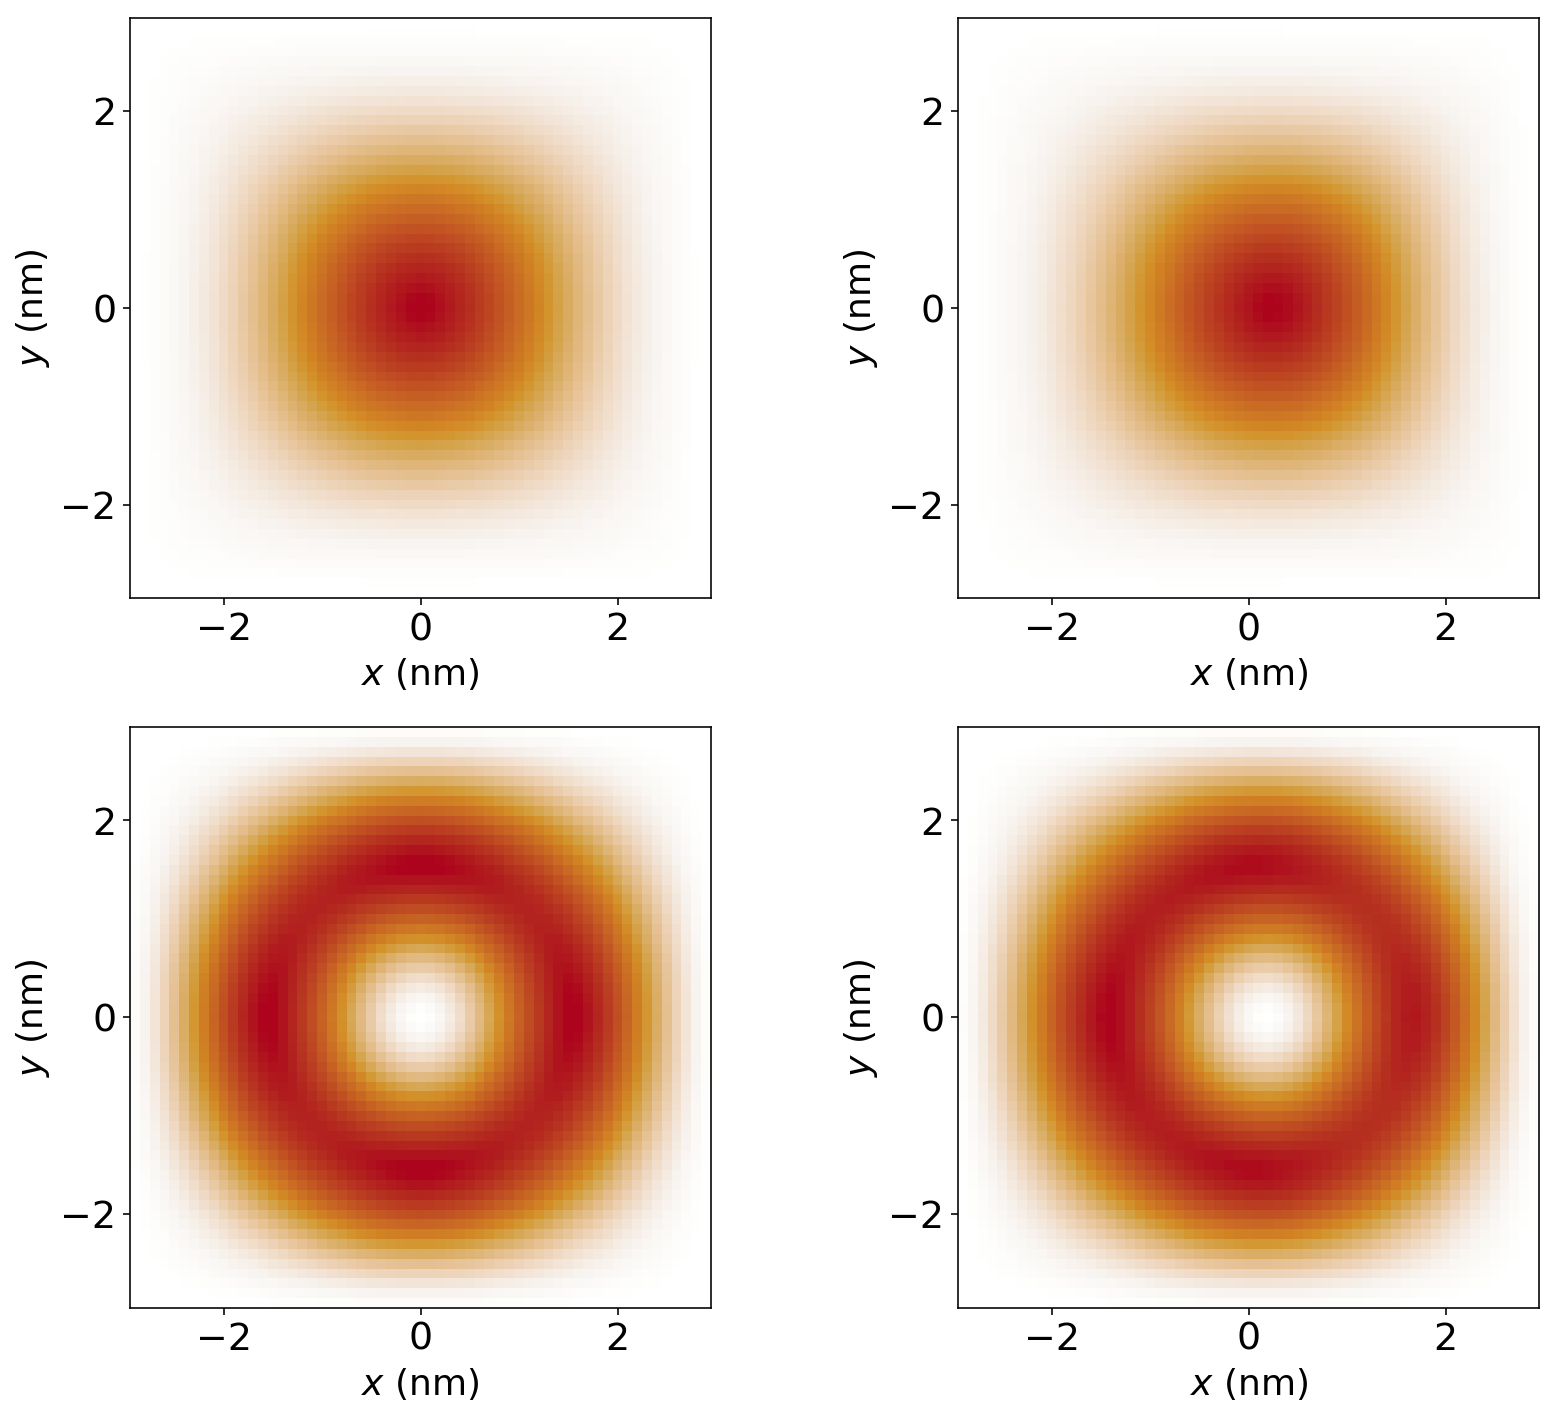

In [6]:
fontsize_label = 18
fontsize_ticks = 19


_, axes = plt.subplots(
    2, 2, figsize=(12, 10), 
)

plot(axes[0, 0], 0, 0)
plot(axes[0, 1], 10e-3, 0)
plot(axes[1, 0], 0, 2)
plot(axes[1, 1], 10e-3, 2)


for _, ax in np.ndenumerate(axes):
    ax.set_xlabel('$x$ (nm)', fontsize=fontsize_label)
    ax.set_ylabel('$y$ (nm)', fontsize=fontsize_label)
    
    ax.set_xticks([-2, 0, 2])
    ax.set_yticks([-2, 0, 2])
    
    ax.tick_params(labelsize=fontsize_ticks)
    
plt.tight_layout()
plt.savefig('figures/fig_sup_wave-function.pdf',transparent=True, bbox_inches='tight', pad_inches=0.1) 